In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/datasets/AIML Dataset.csv")

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
df.shape

(6362620, 11)

In [ ]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
df["isFraud"].value_counts()

,count
isFraud,
0,6354407
1,8213


In [ ]:
df["isFlaggedFraud"].value_counts()

,count
isFlaggedFraud,
0,6362604
1,16


In [ ]:
df.isnull().sum()


,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [ ]:
round((df['isFraud'].value_counts()[1]/df.shape[0])*100,2)

np.float64(0.13)

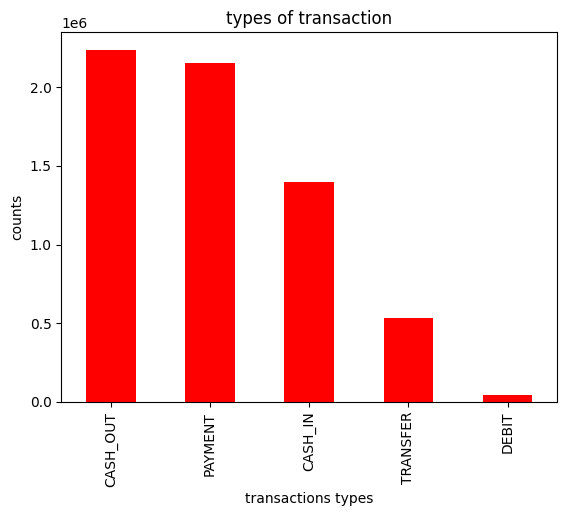

In [ ]:
df['type'].value_counts().plot(kind="bar" , title="types of transaction" , color="red")
plt.xlabel("transactions types")
plt.ylabel("counts")
plt.show()

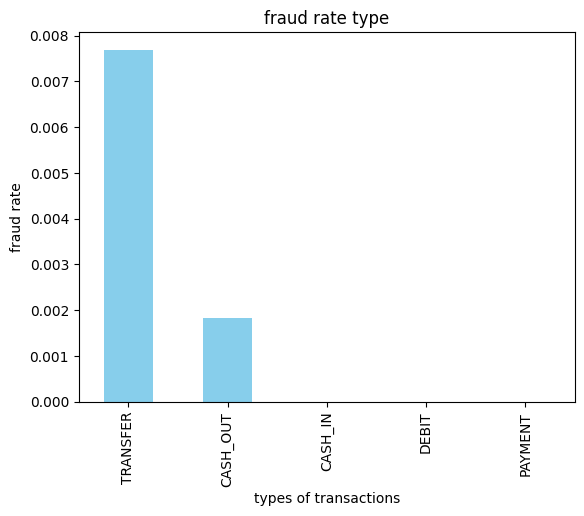

In [ ]:
fraud_by_type= df.groupby("type")["isFraud"].mean().sort_values(ascending=False)
fraud_by_type.plot(kind="bar" , title = "fraud rate type" , color ="skyblue")
plt.xlabel("types of transactions")
plt.ylabel("fraud rate")
plt.show()

In [ ]:
df["amount"].describe().astype(int)

,amount
count,6362620
mean,179861
std,603858
min,0
25%,13389
50%,74871
75%,208721
max,92445516


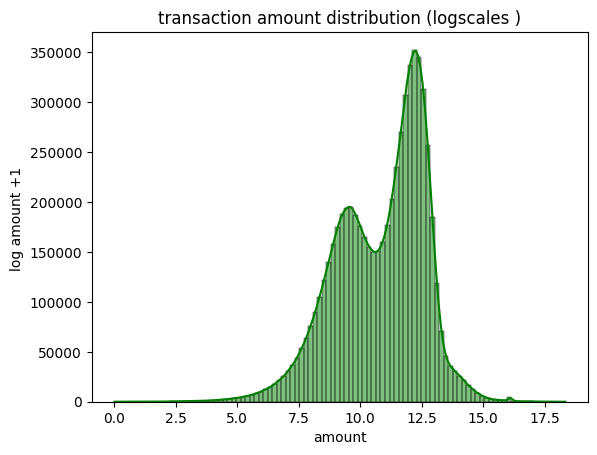

In [ ]:
sns.histplot(np.log1p(df["amount"]), bins = 100 , kde = True , color = "green")
plt.title("transaction amount distribution (logscales )")
plt.xlabel("amount")
plt.ylabel("log amount +1 ")
plt.show()

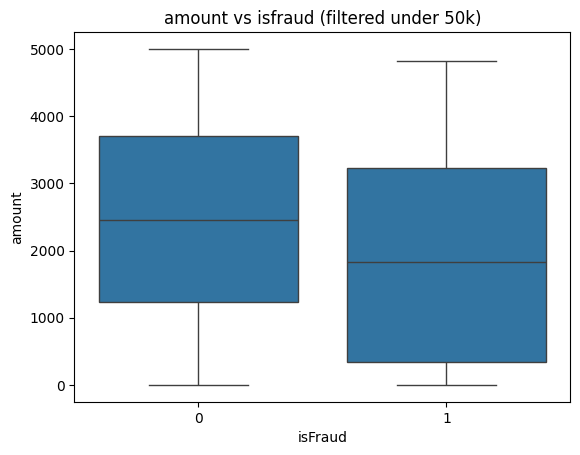

In [ ]:
sns.boxplot(data = df[df["amount"]<5000 ], x= "isFraud" , y = "amount" )
plt.title("amount vs isfraud (filtered under 50k)")
plt.show()

In [ ]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
df["balancedifforigin"]= df["oldbalanceOrg"] - df["newbalanceOrig"]
df["balancediffordest"]= df["oldbalanceDest"] - df["newbalanceDest"]

In [ ]:
(df["balancedifforigin"]<0). sum()

np.int64(1399253)

In [ ]:
(df["balancediffordest"]<0). sum()

np.int64(2806464)

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balancedifforigin,balancediffordest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,21182.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


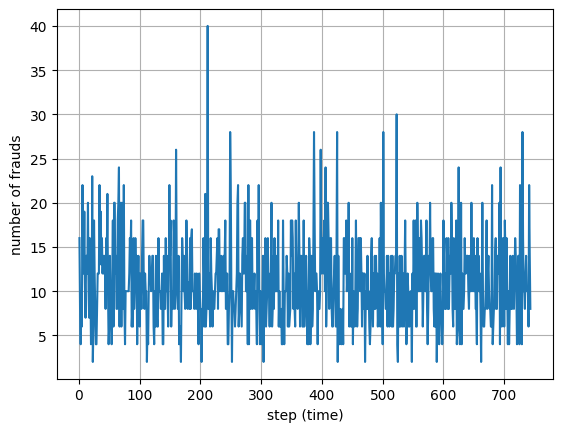

In [ ]:
frauds_per_steps = df[df["isFraud"] == 1]["step"].value_counts().sort_index()
plt.plot(frauds_per_steps.index , frauds_per_steps.values , label = "Frauds per steps")
plt.xlabel("step (time)")
plt.ylabel("number of frauds")
plt.grid(True)
plt.show()

In [ ]:
df.drop(columns = "step", inplace = True)

In [ ]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balancedifforigin,balancediffordest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [ ]:
top_senders = df["nameOrig"].value_counts().head(10)

In [ ]:
top_senders

,count
nameOrig,
C1530544995,3
C545315117,3
C724452879,3
C1784010646,3
C1677795071,3
C1462946854,3
C1065307291,3
C1999539787,3
C2098525306,3


In [ ]:
top_reciver = df["nameDest"].value_counts().head(10)

In [ ]:
top_reciver

,count
nameDest,
C1286084959,113
C985934102,109
C665576141,105
C2083562754,102
C248609774,101
C1590550415,101
C1789550256,99
C451111351,99
C1360767589,98


In [ ]:
fraud_uers = df[df["isFraud"]==1 ] ["nameOrig"].value_counts().head(10)

In [ ]:
fraud_uers

,count
nameOrig,
C1280323807,1
C1305486145,1
C840083671,1
C1420196421,1
C2101527076,1
C1039979813,1
C2089752665,1
C1614818636,1
C40604503,1


In [ ]:
fraud_types =  df[df["type"].isin(["TRANSFER","CASH_OUT"])]

In [ ]:
fraud_types["type"].value_counts()

,count
type,
CASH_OUT,2237500
TRANSFER,532909


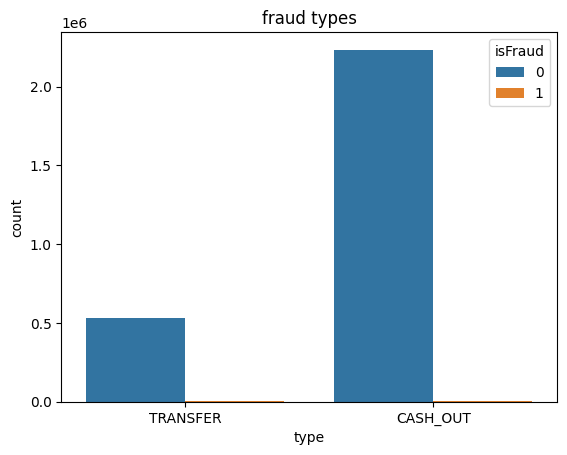

In [ ]:
sns.countplot(data = fraud_types , x = "type" , hue = "isFraud")
plt.title("fraud types")
plt.show()

In [ ]:
corr = df[["amount" , "oldbalanceOrg" , "newbalanceOrig" , "oldbalanceDest" , "newbalanceDest" , "isFraud"]].corr()

In [ ]:
corr

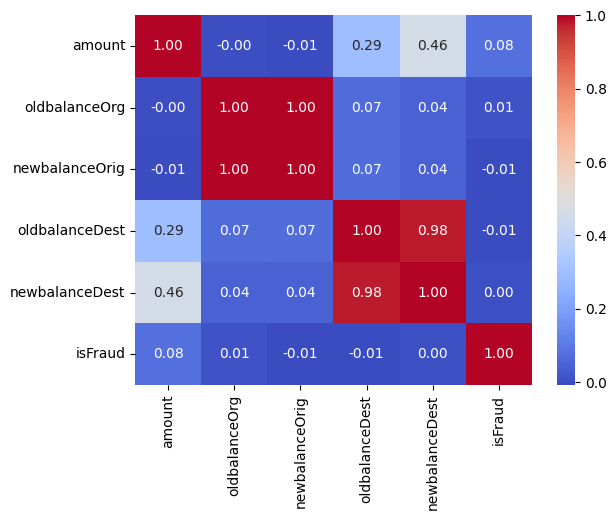

In [ ]:
sns. heatmap(corr , annot = True ,cmap = "coolwarm" , fmt = ".2f")
plt.show()

In [ ]:
zero_after_transfer = df[
    (df['oldbalanceOrg'] > 0 ) &
    (df['newbalanceOrig'] == 0) &
   (df['type'].isin(['TRANSFER', 'CASH_OUT']))
]


In [ ]:
len(zero_after_transfer)

1188074

In [ ]:
zero_after_transfer.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balancedifforigin,balancediffordest
2,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.0,0.00
3,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,181.0,21182.00
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,15325.0,-46430.44
19,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,705.0,22425.00
24,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,10835.0,-2712905.89


In [ ]:
df["isFraud"].value_counts()

,count
isFraud,
0,6354407
1,8213


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


In [ ]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balancedifforigin,balancediffordest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [ ]:
df_model = df.drop(["nameOrig", "nameDest" , "isFlaggedFraud"], axis = 1)

In [ ]:
df_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balancedifforigin,balancediffordest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0


In [ ]:
categorical = ["type"]
numeric = ["amount" , "oldbalanceOrg" , "newbalanceOrig" , "oldbalanceDest" , "newbalanceDest"]

In [ ]:
y = df_model["isFraud"]
x= df_model.drop("isFraud" , axis = 1)

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.3 , stratify = y)

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric),
         ('cat', OneHotEncoder(drop= "first"), categorical)

    ],
    remainder = "drop"
)

In [ ]:
pipeline = Pipeline( [
    ("prep", preprocessor),
    ("clf", LogisticRegression(class_weight="balanced", max_iter=1000))
])


In [ ]:
pipeline.fit(x_train , y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [ ]:
y_pred = pipeline.predict(x_test)

In [ ]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97   1906322
           1       0.02      0.94      0.04      2464

    accuracy                           0.94   1908786
   macro avg       0.51      0.94      0.51   1908786
weighted avg       1.00      0.94      0.97   1908786



In [ ]:
confusion_matrix(y_test , y_pred)


array([[1799196,  107126],
       [    139,    2325]])

In [ ]:
pipeline.score(x_test , y_test ) * 100

94.38045962197963

In [ ]:
import joblib
joblib.dump(pipeline , "fraud_detection_pipeline.pkl")

['fraud_detection_pipeline.pkl']